In [1]:
import tensorflow as tf
import os

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
img_height, img_width = (224, 224)
batch_size = 32

train_data_dir = r"data_pictures\Training"
valid_data_dir = r"data_pictures\Testing"
test_data_dir = r"data_pictures\Validation"

In [5]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

valid_generator = datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=4,
    class_mode='categorical',
    shuffle=True)

Found 302 images belonging to 6 classes.
Found 54 images belonging to 6 classes.


In [6]:
test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical')

Found 42 images belonging to 6 classes.


In [7]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, start_from_epoch=10)

model.fit(train_generator, epochs = 25, validation_data = valid_generator, callbacks=[early_stopping])

Epoch 1/25


C:\Users\Kim_W\Validierung_Code\imageclassification\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.3798 - loss: 1.7599 - val_accuracy: 0.5556 - val_loss: 1.5026
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.5002 - loss: 1.4250 - val_accuracy: 0.5370 - val_loss: 1.2947
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.5776 - loss: 1.2346 - val_accuracy: 0.6296 - val_loss: 1.1623
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.6673 - loss: 1.0807 - val_accuracy: 0.7037 - val_loss: 1.0499
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.8119 - loss: 0.9340 - val_accuracy: 0.7222 - val_loss: 0.9625
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.8219 - loss: 0.7989 - val_accuracy: 0.6667 - val_loss: 0.8886
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.8976 - loss: 0.7463 - val_accuracy: 0.6667 - val_loss: 0.8238
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9201 - loss: 0.6636 - val_accuracy: 0.6667 - val_loss: 0.7751
Epo

In [8]:
model.save(os.path.join('models', 'ResNet50_pictures.h5'))

In [9]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

42/42 - 8s - 182ms/step - accuracy: 0.7619 - loss: 0.6821

Test accuracy: 0.761904776096344


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

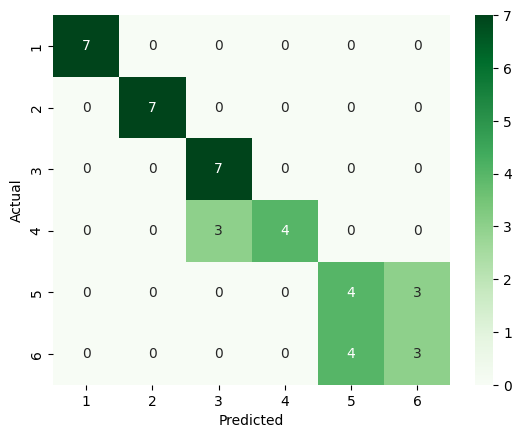

test accuracy: 76.19047619047619


In [10]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model(r"models\ResNet50_pictures.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob = []
y_act = []
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = next(test_generator)
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, cmap='Greens', annot=True, fmt='d')
plt.show()
print('test accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))